# Logistic Regression (Multiclass Classification)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
dir(digits)

In [ ]:
digits.data[2]

In [ ]:
for i in range(1):
    plt.matshow(digits.images[i])
    


In [ ]:
digits.target[:10]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

In [ ]:
len(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)
#model.predict([[2]])

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.predict(digits.data[67])

# Second time

In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

In [ ]:
digits.data[0]

In [ ]:
plt.gray()
for i in range(1,5):
    plt.matshow(digits.images[i])


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
digits.target[67]

In [ ]:
model.predict([digits.data[67]])

In [ ]:
model.predict(digits.data[0:5])

###  To know where my model is not doing good

In [ ]:
y_predictcaed = model.predict(x_test)
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(y_test,y_predictcaed)

Text(69.0, 0.5, 'Truth')

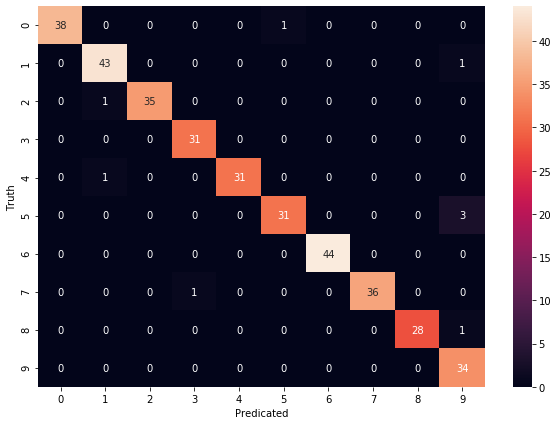

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicated')
plt.ylabel('Truth')

# Excerise from Edurekha
https://www.youtube.com/watch?v=VCJdg7YBbAQ

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import math

In [32]:
tit = pd.read_csv(r"C:\Users\Lenovo\Desktop\Data_Science\src\titanic_data")
tit.head(2)

PassengerId  Survived   Pclass  \
1            0         3   Braund   
2            1         1  Cumings   

                                          Name     Sex   Age  SibSp  Parch  \
1                              Mr. Owen Harris    male  22.0      1      0   
2   Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   

      Ticket     Fare Cabin Embarked  
1  A/5 21171   7.2500   NaN        S  
2   PC 17599  71.2833   C85        C

In [34]:
print("No of passengers:" + str(len(tit.index)))

No of passengers:891


## Analysing the data


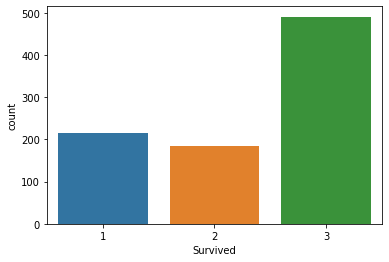

In [36]:
sn.countplot(x='Survived',data = tit)

In [38]:
sn.countplot(x='Survived',hue='Sex',data= tit)

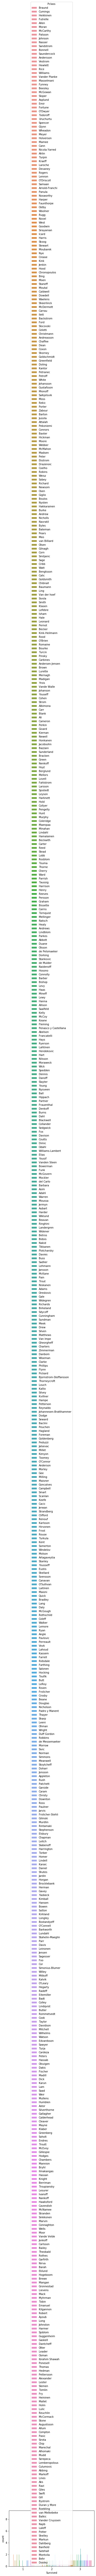

In [39]:
sn.countplot(x='Survived',hue='Pclass',data= tit)

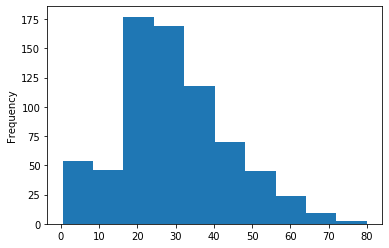

In [41]:
tit['Age'].plot.hist()

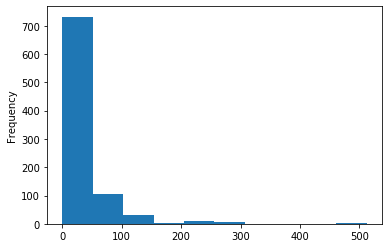

In [42]:
tit['Fare'].plot.hist()

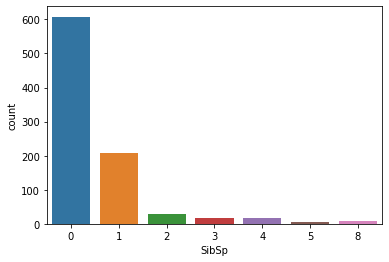

In [43]:
sn.countplot(x='SibSp',data= tit)

## Data Wrangling

In [44]:
tit.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False   True  False  False   False   
890        False     False   False  False  False  False  False  False   False   
891        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
1    False   True     False  
2    False  False     False  
3    False   True     False  
4    False  False     False  
5    False   True     False  
..     ...    ...       ...  
887  False   True     False  
888  False  False     False  
889  False   True     False  
890  False  False     False  
891  False   True     False  

[891 rows x 12 columns]

In [46]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

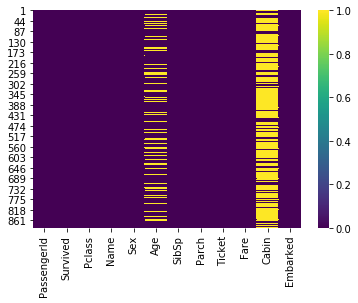

In [51]:
sn.heatmap(tit.isnull(), cmap='viridis')

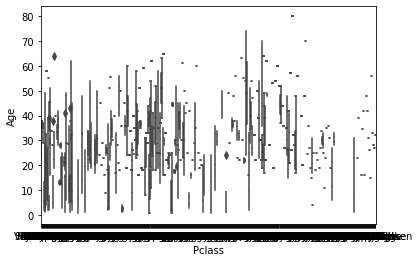

In [52]:
sn.boxplot(x='Pclass',y='Age',data=tit)

In [66]:
tit.dropna(inplace=True)

In [67]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
tit.head(2)

PassengerId  Survived   Pclass  \
1            0         3   Braund   
2            1         1  Cumings   

                                          Name     Sex   Age  SibSp  Parch  \
1                              Mr. Owen Harris    male  22.0      1      0   
2   Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   

      Ticket     Fare Embarked  
1  A/5 21171   7.2500        S  
2   PC 17599  71.2833        C

In [72]:
dum = pd.get_dummies(tit['Sex'],drop_first=True)

In [73]:
dum

male
1       1
2       0
3       0
4       0
5       1
..    ...
886     0
887     1
888     0
890     1
891     1

[712 rows x 1 columns]

In [74]:
emb = pd.get_dummies(tit['Embarked'],drop_first=True)

In [75]:
emb

Q  S
1    0  1
2    0  0
3    0  1
4    0  1
5    0  1
..  .. ..
886  1  0
887  0  1
888  0  1
890  0  0
891  1  0

[712 rows x 2 columns]

In [76]:
pc = pd.get_dummies(tit['Pclass'],drop_first=True)
pc

Abbott  Abelson  Adahl  Adams  Ahlin  Aks  Albimona  Alexander  Alhomaki  \
1         0        0      0      0      0    0         0          0         0   
2         0        0      0      0      0    0         0          0         0   
3         0        0      0      0      0    0         0          0         0   
4         0        0      0      0      0    0         0          0         0   
5         0        0      0      0      0    0         0          0         0   
..      ...      ...    ...    ...    ...  ...       ...        ...       ...   
886       0        0      0      0      0    0         0          0         0   
887       0        0      0      0      0    0         0          0         0   
888       0        0      0      0      0    0         0          0         0   
890       0        0      0      0      0    0         0          0         0   
891       0        0      0      0      0    0         0          0         0   

     Ali  ...  Young  Youseff  Yrois  Zabour  Zimmerman  de Messemaeker  \
1      0  ...      0        0      0       0          0               0   
2      0  ...      0        0      0       0          0               0   
3      0  ...      0        0      0       0          0               0   
4      0  ...      0        0      0       0          0               0   
5      0  ...      0        0      0       0          0               0   
..   ...  ...    ...      ...    ...     ...        ...             ...   
886    0  ...      0        0      0       0          0               0   
887    0  ...      0        0      0       0          0               0   
888    0  ...      0        0      0       0          0               0   
890    0  ...      0        0      0       0          0               0   
891    0  ...      0        0      0       0          0               0   

     de Mulder  de Pelsmaeker  del Carlo  van Billiard  
1            0              0          0             0  
2            0              0          0             0  
3            0              0          0             0  
4            0              0          0             0  
5            0              0          0             0  
..         ...            ...        ...           ...  
886          0              0          0             0  
887          0              0          0             0  
888          0              0          0             0  
890          0              0          0             0  
891          0              0          0             0  

[712 rows x 532 columns]

In [82]:
final = pd.concat([tit,dum,emb],axis=1)

In [83]:
final.head(2)

PassengerId  Survived   Pclass  \
1            0         3   Braund   
2            1         1  Cumings   

                                          Name     Sex   Age  SibSp  Parch  \
1                              Mr. Owen Harris    male  22.0      1      0   
2   Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   

      Ticket     Fare Embarked  male  Q  S  
1  A/5 21171   7.2500        S     1  0  1  
2   PC 17599  71.2833        C     0  0  0

In [90]:
final.drop(['Pclass'],axis=1,inplace=True)

In [91]:
final.head(2)

Survived   Age  SibSp  Parch     Fare  male  Q  S
1         3  22.0      1      0   7.2500     1  0  1
2         1  38.0      1      0  71.2833     0  0  0

In [101]:
y = final['Survived']
x = final.drop(['Survived'],axis=1)
y.head(2)
x.head(2)


Age  SibSp  Parch     Fare  male  Q  S
1  22.0      1      0   7.2500     1  0  1
2  38.0      1      0  71.2833     0  0  0

In [99]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
reg.score(x,y)

0.44067734206503795

In [102]:
reg.predict([[44,1,0,3993.0,0,0,0]])

array([-28.96733953])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [105]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
reg.score(X_train,y_train)

0.4318587153227482

In [117]:
predictions = reg.predict(X_test)

In [118]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets